<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/SingleGaussianBGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Détection de changements: Méthode simple Gaussienne

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

Lecture d'images pour entraîner le modèle. (Images provenant PETS 2006, http://www.cvg.reading.ac.uk/PETS2006/data.html)

In [2]:
image_name = 'in000001.jpg'
if not os.path.exists(image_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000001.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000003.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000004.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000005.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000235.jpg

Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000001.jpg
To: /content/in000001.jpg
100% 174k/174k [00:00<00:00, 2.76MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000003.jpg
To: /content/in000003.jpg
100% 175k/175k [00:00<00:00, 5.73MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000004.jpg
To: /content/in000004.jpg
100% 174k/174k [00:00<00:00, 2.76MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000005.jpg
To: /content/in000005.jpg
100% 174k/174k [00:00<00:00, 5.62MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000235.jpg
To: /content/in000235.jpg
100% 177k/177k [00:00<00:00, 5.69MB/s]


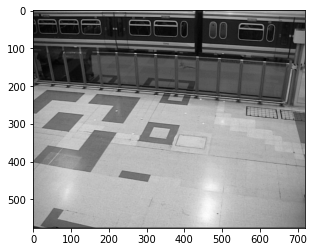

In [3]:
image1 = (cv2.imread('in000001.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
plt.imshow(image1, cmap = plt.get_cmap('gray'))
plt.show()
image2 = (cv2.imread('in000003.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
image3 = (cv2.imread('in000004.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
image4 = (cv2.imread('in000005.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)

Dans cet exemple, les calculs sont faits sur une image en tons de gris. Pour entraîner le modèle, on doit calculer la moyenne et la variance. Ce modèle est le modèle de l'arrière-plan de la scène.

In [4]:
Moy = (image1 + image2 + image3 + image4)/4.0
Var = (np.power(image1,2) + np.power(image2,2) + np.power(image3,2) + np.power(image4,2))/4.0 - np.power(Moy,2)

Lecture de l'image qui sera utilisée pour la détection de changements.

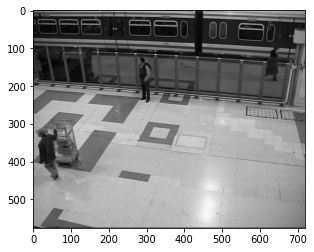

In [5]:
imagedet = (cv2.imread('in000235.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
plt.imshow(imagedet, cmap = plt.get_cmap('gray'))
plt.show()

Les changements sont constitué des pixels qui ne correpondent pas au modèle d'arrière-plan. Ces pixels sont considérés comme l'avant-plan.

In [6]:
n = 10 #Ajuste la sensibilité de la détection
Avantplan = np.abs(imagedet - Moy)> n*np.sqrt(Var)

Affichage du résultats avec l'avant-plan en blanc.

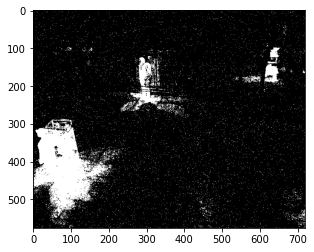

In [7]:
plt.imshow(~Avantplan,plt.get_cmap('binary'))
plt.show()

Les seuils pour chaque pixel sont différents et dépendent de l'écart-type qui peut être <1

In [8]:
print(np.sqrt(Var))

[[0.8660254  1.47901995 2.16506351 ... 1.29903811 2.12132034 2.73861279]
 [1.11803399 2.27760839 0.8291562  ... 1.         1.08972474 1.29903811]
 [1.41421356 3.082207   1.08972474 ... 1.29903811 1.11803399 1.78535711]
 ...
 [2.5        1.41421356 1.87082869 ... 0.70710678 0.4330127  1.87082869]
 [1.08972474 1.22474487 0.8291562  ... 0.4330127  0.8291562  1.5       ]
 [1.11803399 0.4330127  0.4330127  ... 0.4330127  0.70710678 0.8660254 ]]
